In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Download yesterday's data for calibrating model coefficients

In [2]:
TSLAy = yf.download('TSLA', start='2023-04-05', end='2023-04-06',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [3]:
TSLAy

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-05 09:30:00-04:00,190.514999,190.679993,189.720001,190.315002,190.315002,3894761
2023-04-05 09:31:00-04:00,190.324493,190.539993,189.649994,190.080002,190.080002,695902
2023-04-05 09:32:00-04:00,190.089996,190.089996,189.320007,189.850006,189.850006,735471
2023-04-05 09:33:00-04:00,189.880005,190.330002,189.600998,189.910004,189.910004,601844
2023-04-05 09:34:00-04:00,189.939896,190.020004,189.595001,189.889893,189.889893,401843
...,...,...,...,...,...,...
2023-04-05 15:55:00-04:00,186.095001,186.220001,186.009995,186.059998,186.059998,494169
2023-04-05 15:56:00-04:00,186.065002,186.119904,185.949997,185.966797,185.966797,301895
2023-04-05 15:57:00-04:00,185.970001,185.979996,185.815002,185.929993,185.929993,401829


In [4]:
AAPLy = yf.download('AAPL', start='2023-04-05', end='2023-04-06',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [5]:
AAPLy

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-05 09:30:00-04:00,164.740005,165.000000,164.279999,164.520004,164.520004,2000021
2023-04-05 09:31:00-04:00,164.529999,164.755997,164.449997,164.539993,164.539993,282273
2023-04-05 09:32:00-04:00,164.550003,164.619995,164.460007,164.505005,164.505005,211261
2023-04-05 09:33:00-04:00,164.506805,164.869995,164.496201,164.720001,164.720001,232194
2023-04-05 09:34:00-04:00,164.720001,164.795700,164.639999,164.690002,164.690002,163608
...,...,...,...,...,...,...
2023-04-05 15:55:00-04:00,163.789993,163.889999,163.759995,163.879898,163.879898,317017
2023-04-05 15:56:00-04:00,163.887695,163.889999,163.800003,163.833099,163.833099,365009
2023-04-05 15:57:00-04:00,163.839996,163.910004,163.800003,163.880005,163.880005,326340


In [6]:
lr1 = np.log(TSLAy['Adj Close'] / TSLAy['Adj Close'].shift(1))
lr2 = np.log(AAPLy['Adj Close'] / AAPLy['Adj Close'].shift(1))
mu_1 = lr1.mean() * 390
mu_2 = lr2.mean() * 390
sigma_1 = lr1.std() * np.sqrt(390)
sigma_2 = lr2.std() * np.sqrt(390)
rho = lr1.corr(lr2)
z_0 = 0.00
gamma = 0.5
delta = 0.8
T = 1
M = len(TSLAy)

In [7]:
result = linregress(np.log(TSLAy['Adj Close']), np.log(AAPLy['Adj Close']))
beta = result.slope

### Download today's data for feedback control

In [8]:
TSLA = yf.download('TSLA', start='2023-04-06', end='2023-04-07',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [9]:
TSLA

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-06 09:30:00-04:00,183.080002,183.819901,182.300003,183.347504,183.347504,4883073
2023-04-06 09:31:00-04:00,183.339996,183.610001,182.710007,182.750000,182.750000,743275
2023-04-06 09:32:00-04:00,182.789993,182.789993,181.429993,181.470001,181.470001,1297856
2023-04-06 09:33:00-04:00,181.449997,181.720001,180.440002,180.884995,180.884995,1210476
2023-04-06 09:34:00-04:00,180.910004,180.960007,180.199997,180.460007,180.460007,844603
...,...,...,...,...,...,...
2023-04-06 15:55:00-04:00,184.970001,185.190002,184.870102,185.160004,185.160004,355890
2023-04-06 15:56:00-04:00,185.159195,185.259995,185.130005,185.229996,185.229996,323255
2023-04-06 15:57:00-04:00,185.225006,185.279999,185.200104,185.260895,185.260895,215198


In [10]:
AAPL = yf.download('AAPL', start='2023-04-06', end='2023-04-07',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [11]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-06 09:30:00-04:00,162.429993,162.729996,162.044998,162.729996,162.729996,1710990
2023-04-06 09:31:00-04:00,162.720001,162.740005,162.389999,162.449997,162.449997,261820
2023-04-06 09:32:00-04:00,162.460007,162.490005,162.130005,162.149994,162.149994,366370
2023-04-06 09:33:00-04:00,162.139999,162.251999,162.089996,162.110001,162.110001,286884
2023-04-06 09:34:00-04:00,162.100006,162.136993,162.039993,162.059998,162.059998,168756
...,...,...,...,...,...,...
2023-04-06 15:55:00-04:00,164.389999,164.554993,164.389999,164.544998,164.544998,368968
2023-04-06 15:56:00-04:00,164.539993,164.580002,164.490005,164.559998,164.559998,167296
2023-04-06 15:57:00-04:00,164.552505,164.600006,164.550003,164.589996,164.589996,213092


In [12]:
S1_0 = TSLA['Open'][0]
S2_0 = AAPL['Open'][0]

In [13]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

### Simulate co-integrated factor

In [14]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn[t]);
    S1[t] = TSLA['Adj Close'][t-1]
    S2[t] = AAPL['Adj Close'][t-1]

Text(0.5, 1.0, 'Stock Price')

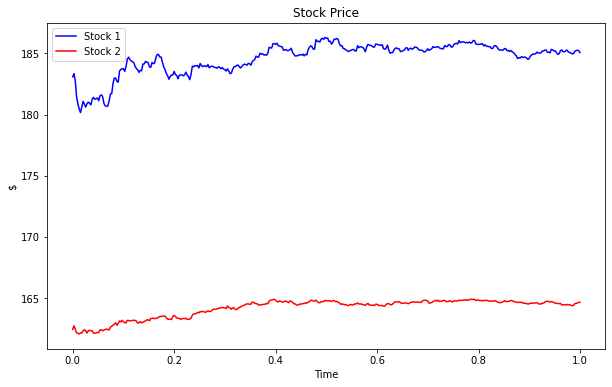

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Stock 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Stock 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'z')

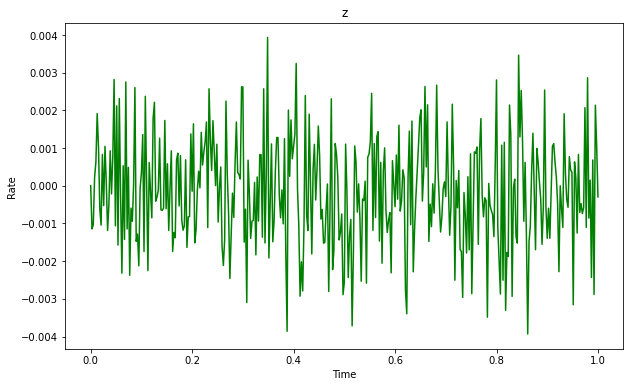

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

### Trading Strategies

In [17]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t-1]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t-1]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

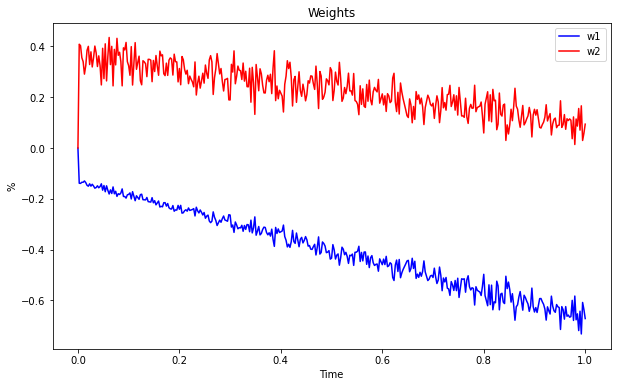

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Wealth')

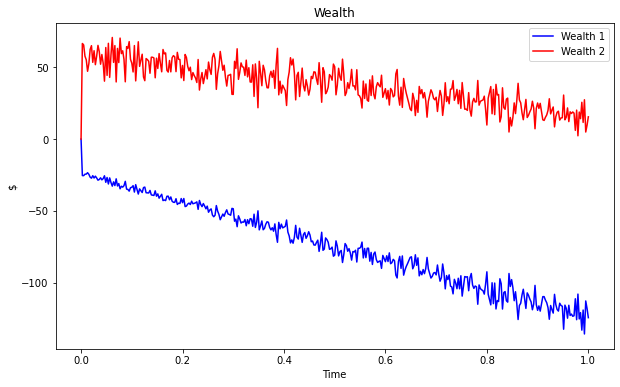

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [20]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

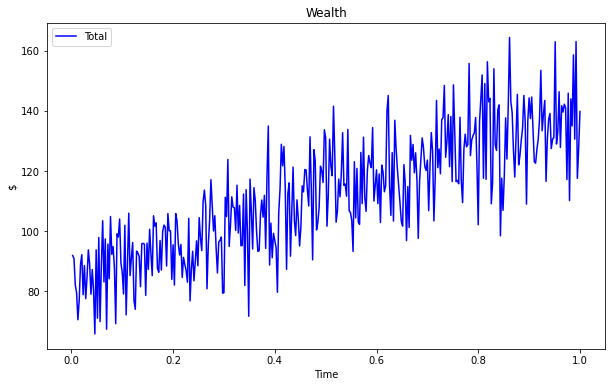

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

### Return

In [22]:
Wealth[1]   # Inital Wealth

array([91.94681927])

In [23]:
Wealth[-1]  # Ending Wealth

array([139.80462865])

In [24]:
Return = (Wealth[-1] - Wealth[1])/Wealth[1]  # Return
Return.item()

0.5204944527222657